# Diabetes Prediction 
## In this project we will are going to make prediction of chance of a patient having chance of diabetes based on some given features listed below
### Pregnancies: Number of times pregnant
### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
### BloodPressure: Diastolic blood pressure (mm Hg)
###SkinThickness: Triceps skin fold thickness (mm)
### Insulin: 2-Hour serum insulin (mu U/ml)
### BMI: Body mass index (weight in kg/(height in m)^2)
### DiabetesPedigreeFunction: Diabetes pedigree function
### Age: Age (years)
## The target varaible we are predicting is 'Outcome' of the test result. Whether the patient have chance of having diabetes based on the test or not 

### Outcome: Class variable (0 or 1)
### 1 means there is high chance of the patients having diabetes and 0 means the patient is free from diabetes based on the test result  


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [34]:
diabetes_data = pd.read_csv("/content/drive/MyDrive/Diabetes dataset/diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


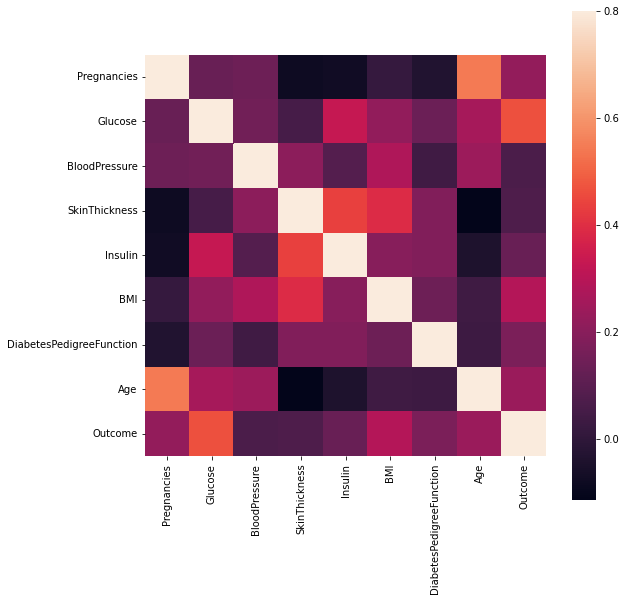

In [37]:
#correlation of the data
%matplotlib inline
corrmat = diabetes_data.corr()
f, ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [38]:
#spliting the data into X and Y
X = diabetes_data.drop(["Outcome"], axis=1)
Y = diabetes_data["Outcome"]                     

In [39]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [40]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

In [42]:
# Using different machine learning algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Logistic Regression

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

LinR = LogisticRegression()
LinR.fit(X_train, Y_train)
pred = LinR.predict(X_test)
print("Model Accuracy: ", accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

Model Accuracy:  0.8246753246753247
[[98  9]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Linear Discriminant Analysis

In [44]:
LinD = LinearDiscriminantAnalysis()
LinD.fit(X_train, Y_train)
pred = LinD.predict(X_test)
print("Model Accuracy: ", accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

Model Accuracy:  0.8246753246753247
[[98  9]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



## GaussianNB from Naive Bayes

In [45]:
G = GaussianNB()
G.fit(X_train, Y_train)
pred = G.predict(X_test)
print("Model Accuracy: ", accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

Model Accuracy:  0.7922077922077922
[[93 14]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



## Support Vector Machine using rbf kernel

In [46]:
C = 1.0

s = SVC(kernel="rbf", C=C)
s.fit(X_train, Y_train)
pred = s.predict(X_test)
print("Model Accuracy: ", accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

Model Accuracy:  0.7922077922077922
[[98  9]
 [23 24]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



## Support Vector Machine using sigmoid kernel 

In [47]:
C = 1.0

s = SVC(kernel="sigmoid", C=C)

s.fit(X_train, Y_train)
pred = s.predict(X_test)
print("Model Accuracy: ", accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

Model Accuracy:  0.512987012987013
[[73 34]
 [41  6]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       107
           1       0.15      0.13      0.14        47

    accuracy                           0.51       154
   macro avg       0.40      0.40      0.40       154
weighted avg       0.49      0.51      0.50       154



## Support Vector Machine using polynomial kernel 

In [48]:
C = 1.0

s = SVC(kernel="poly", C=C)

s.fit(X_train, Y_train)
pred = s.predict(X_test)
print("Model Accuracy: ", accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

Model Accuracy:  0.7922077922077922
[[98  9]
 [23 24]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



## Decision Trees

In [49]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Model Accuracy: ", accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

Model Accuracy:  0.7857142857142857
[[87 20]
 [13 34]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       107
           1       0.63      0.72      0.67        47

    accuracy                           0.79       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.80      0.79      0.79       154



## KNN

In [50]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Model Accuracy: ", accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

Model Accuracy:  0.7857142857142857
[[87 20]
 [13 34]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       107
           1       0.63      0.72      0.67        47

    accuracy                           0.79       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.80      0.79      0.79       154



## Random Forest Classifiers

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Model Accuracy: ", accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

Model Accuracy:  0.7857142857142857
[[100   7]
 [ 26  21]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       107
           1       0.75      0.45      0.56        47

    accuracy                           0.79       154
   macro avg       0.77      0.69      0.71       154
weighted avg       0.78      0.79      0.77       154



## Perceptron

In [52]:
from sklearn.linear_model import Perceptron
pre = Perceptron()

pre.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Model Accuracy: ", accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

Model Accuracy:  0.7857142857142857
[[100   7]
 [ 26  21]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       107
           1       0.75      0.45      0.56        47

    accuracy                           0.79       154
   macro avg       0.77      0.69      0.71       154
weighted avg       0.78      0.79      0.77       154



In [58]:
import pickle

file = "/content/drive/MyDrive/Diabetes dataset/model.pickle"

with open(file, "wb") as f:
  pickle.dump(LinD, f)

In [59]:
with open(file, "rb") as f:
  l = pickle.load(f)

In [60]:
l.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])